In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Se utilizzo Colab, importo il file owid-covid-data.csv
#path = '/content/drive/MyDrive/esame python/owid-covid-data.csv'
#df = pd.read_csv(path)

# In altri IDE, importo il dataset owid-covid-data.csv
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
# Visualizzo le dimensioni del df
df.shape

(429435, 67)

In [5]:
# Procedo con l'analisi e l'eventuale pulizia del df (legata alle richieste del progetto)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
# Visualizzo delle righe random per capire com'è strutturato il df
df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
170087,HKG,Asia,Hong Kong,2024-04-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.86,0.949,7488863,NaN,NaN,NaN,NaN
167026,HND,North America,Honduras,2020-06-06,4886.0,0.0,201.286,199.0,0.0,4.571,...,NaN,84.169,0.70,75.27,0.634,10432858,NaN,NaN,NaN,NaN
365860,LKA,Asia,Sri Lanka,2024-05-23,672763.0,0.0,0.143,16901.0,0.0,0.000,...,27.0,NaN,3.60,76.98,0.782,21832150,NaN,NaN,NaN,NaN
377356,TZA,Africa,Tanzania,2020-02-04,0.0,0.0,0.000,0.0,0.0,0.000,...,26.7,47.953,0.70,65.46,0.529,65497752,NaN,NaN,NaN,NaN
294520,PSE,Asia,Palestine,2020-07-22,9587.0,0.0,414.143,62.0,0.0,4.286,...,NaN,NaN,NaN,74.05,0.708,5250076,NaN,NaN,NaN,NaN
351844,SVN,Europe,Slovenia,2022-09-07,1131968.0,0.0,1272.286,8191.0,0.0,4.000,...,25.0,NaN,4.50,81.32,0.917,2119843,NaN,NaN,NaN,NaN
338149,OWID_SCT,Europe,Scotland,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5466000,NaN,NaN,NaN,NaN
257812,MOZ,Africa,Mozambique,2021-12-27,164862.0,0.0,785.571,1960.0,0.0,1.429,...,29.1,12.227,0.70,60.85,0.456,32969520,NaN,NaN,NaN,NaN
170309,HUN,Europe,Hungary,2020-04-22,1916.0,0.0,72.286,189.0,0.0,12.857,...,34.8,NaN,7.02,76.88,0.854,9967304,NaN,NaN,NaN,NaN
307647,POL,Europe,Poland,2024-05-31,6663029.0,0.0,20.143,120711.0,0.0,0.000,...,33.1,NaN,6.62,78.73,0.880,39857144,NaN,NaN,NaN,NaN


In [7]:
# Richiesta 1: Trovare, per ogni continente, il numero di casi totali e la percentuale rispetto al totale mondiale

# Per fare ciò, seleziono le colonne di mio interesse (continent, date, total_cases, population) e creo un nuovo dataframe
continent_cases = df.loc[:, ['continent', 'date', 'total_cases', 'population']].copy()

# Controllo il tipo di dato per ogni colonna
continent_cases.info()

# Nota: non ho considerato nell'analisi il valori nulli e i duplicati in quanto ho utilizzato solo i valori massimi di total cases

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   continent    402910 non-null  object 
 1   date         429435 non-null  object 
 2   total_cases  411804 non-null  float64
 3   population   429435 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ MB


In [8]:
# Per ogni continente, seleziono il valore massimo di total_cases
continent_cases = continent_cases.groupby('continent').max()

# Calcolo il totale mondiale dei casi, che corrisponde alla somma dei casi per ogni continente
world_cases = continent_cases['total_cases'].sum()

# Calcolo la percentuale di casi per ogni continente rispetto al totale mondiale e aggiungo la colonna a continent_cases
continent_cases['%_on_global'] = continent_cases['total_cases'] / world_cases * 100

# Per ogni continente, calcolo il totale della popolazione
continent_cases['population'] = continent_cases.groupby('continent')['population'].sum()

# Calcolo la percentuale di casi per ogni continente rispetto alla popolazione del continente
continent_cases['%_on_population'] = continent_cases['total_cases'] / continent_cases['population'] * 100

# Rinomino la colonna 'date' in 'last_update' (in quanto considero il valore massimo di total_cases)
continent_cases = continent_cases.rename(columns={'date': 'last_update'})

# Riordino le colonne del dataframe con 'last_update', 'total_cases', '%_on_global', 'population', '%_on_population'
continent_cases = continent_cases[['last_update', 'total_cases', '%_on_global', 'population', '%_on_population']]

continent_cases

,last_update,total_cases,%_on_global,population,%_on_population
continent,,,,,
Africa,2024-08-04,4072765.0,1.379413,218541216,1.863614
Asia,2024-08-14,99373219.0,33.656928,1425887360,6.969219
Europe,2024-08-14,38997490.0,13.208143,144713312,26.948101
North America,2024-08-04,103436829.0,35.033241,338289856,30.576391
Oceania,2024-08-11,11861161.0,4.017282,26177410,45.310674
South America,2024-08-04,37511921.0,12.704993,215313504,17.422001


Osservazioni principali:
- Asia e North America corrispondono a quasi il 70% dei casi mondiali
- L'Africa, nonostante un'alta popolazione, ha la percentuale di casi più bassa (possibili ragioni -> diffusione Covid, dati non riportati, densità abitativa)
- Nonostante l'elevato numero di popolazione, l'incidenza in Asia è stata molto bassa (6.9%). Rimangono molto alti i valori assoluti dei casi (> 99M)
- In Oceania, circa una persona su due è stata colpita dal Covid nonostante i casi rispetto ai totali siano molto bassi

In [9]:
# Richiesta 2a: selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici l'evoluzione dei casi toali nell'anno

# Per fare ciò, seleziono le colonne di mio interesse (location, date, total_cases) e creo un nuovo dataframe
italy_cases = df.loc[:, ['location', 'date', 'total_cases']].copy()

# Controllo il tipo di dato di ogni colonna
italy_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   location     429435 non-null  object 
 1   date         429435 non-null  object 
 2   total_cases  411804 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.8+ MB


In [10]:
# Trasformo la colonna 'date' in formato datetime
italy_cases.date = pd.to_datetime(italy_cases.date)

# Seleziono i dati relativi all'Italia nel 2022 utilizzando il metodo loc
italy_cases = italy_cases[(italy_cases.location == 'Italy') & (italy_cases.date.dt.year == 2022)]

italy_cases

,location,date,total_cases
186002,Italy,2022-01-01,5622431.0
186003,Italy,2022-01-02,6267035.0
186004,Italy,2022-01-03,6267035.0
186005,Italy,2022-01-04,6267035.0
186006,Italy,2022-01-05,6267035.0
...,...,...,...
186362,Italy,2022-12-27,25060503.0
186363,Italy,2022-12-28,25060503.0
186364,Italy,2022-12-29,25060503.0
186365,Italy,2022-12-30,25060503.0


In [11]:
# Elimino tutti i valori duplicati in total_cases
italy_cases = italy_cases.drop_duplicates(subset=['total_cases']).copy()

# Calcolo l'incremento percentuale dei casi totali rispetto alla settimana precedente
italy_cases['perc_increment'] = round(italy_cases.total_cases.pct_change() * 100, 2)

# Visualizzo il risultato
italy_cases

,location,date,total_cases,perc_increment
186002,Italy,2022-01-01,5622431.0,NaN
186003,Italy,2022-01-02,6267035.0,11.46
186010,Italy,2022-01-09,7281297.0,16.18
186017,Italy,2022-01-16,8549450.0,17.42
186024,Italy,2022-01-23,9781191.0,14.41
186031,Italy,2022-01-30,10821375.0,10.63
186038,Italy,2022-02-06,11542793.0,6.67
186045,Italy,2022-02-13,12053330.0,4.42
186052,Italy,2022-02-20,12427773.0,3.11
186059,Italy,2022-02-27,12732680.0,2.45


<Axes: xlabel='date', ylabel='total_cases'>

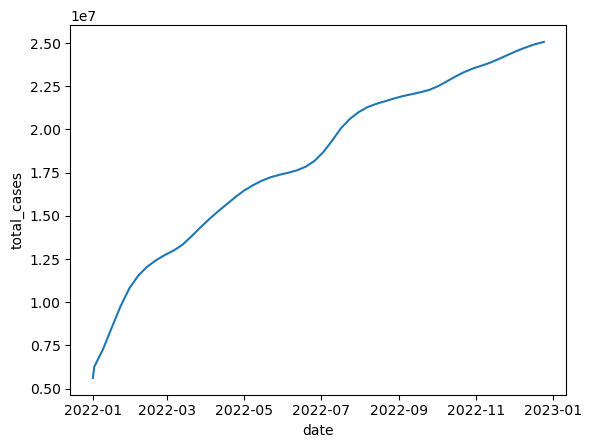

In [12]:
# Creo un grafico che mostra l'evoluzione dei casi totali in Italia nel 2022
sns.lineplot(data=italy_cases, x='date', y='total_cases')

In [13]:
# Richiesta 2b: selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici il numero di casi per ogni settimana

# Utilizzo il df 'italy_cases' già creato
italy_cases

,location,date,total_cases,perc_increment
186002,Italy,2022-01-01,5622431.0,NaN
186003,Italy,2022-01-02,6267035.0,11.46
186010,Italy,2022-01-09,7281297.0,16.18
186017,Italy,2022-01-16,8549450.0,17.42
186024,Italy,2022-01-23,9781191.0,14.41
186031,Italy,2022-01-30,10821375.0,10.63
186038,Italy,2022-02-06,11542793.0,6.67
186045,Italy,2022-02-13,12053330.0,4.42
186052,Italy,2022-02-20,12427773.0,3.11
186059,Italy,2022-02-27,12732680.0,2.45


In [14]:
# Per ogni settimana, calcolo l'incremento del numero di casi
italy_cases['weekly_cases'] = italy_cases.total_cases.diff()

# Calcolo Calcolo l'incremento percentuale dei weekly cases rispetto alla settimana precedente
italy_cases['perc_weekly_increment'] = round(italy_cases.weekly_cases.pct_change() * 100, 2)

italy_cases

,location,date,total_cases,perc_increment,weekly_cases,perc_weekly_increment
186002,Italy,2022-01-01,5622431.0,NaN,NaN,NaN
186003,Italy,2022-01-02,6267035.0,11.46,644604.0,NaN
186010,Italy,2022-01-09,7281297.0,16.18,1014262.0,57.35
186017,Italy,2022-01-16,8549450.0,17.42,1268153.0,25.03
186024,Italy,2022-01-23,9781191.0,14.41,1231741.0,-2.87
186031,Italy,2022-01-30,10821375.0,10.63,1040184.0,-15.55
186038,Italy,2022-02-06,11542793.0,6.67,721418.0,-30.65
186045,Italy,2022-02-13,12053330.0,4.42,510537.0,-29.23
186052,Italy,2022-02-20,12427773.0,3.11,374443.0,-26.66
186059,Italy,2022-02-27,12732680.0,2.45,304907.0,-18.57


<Axes: xlabel='date', ylabel='weekly_cases'>

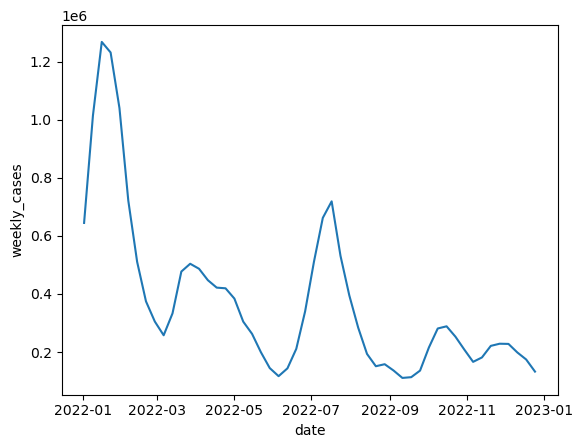

In [15]:
# Creo un grafico lineplot che rappresenta il numero di casi per ogni settimana in Italia nel 2022
sns.lineplot(data=italy_cases, x='date', y='weekly_cases')

Osservazioni principali:
- L'aumento settimanale è più marcato nel mese di gennaio e poi rallenta notevolmente, con qualche eccezione in particolare nella metà dell'anno
- In estate, il picco di aumenti settimanali potrebbe essere dovuto al periodo di ferie estive -> possibile causa la maggior mobilità delle persone (deduzione, non supportato da dati)
- In generale, si osserva un trend in diminuzione dei casi settimanali dall'inizio dell'anno

In [16]:
# Richiesta 3: riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti
# in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

# Per fare ciò, seleziono le colonne di mio interesse (location, date, icu_patients) e creo un nuovo df
countries_icu = df.loc[:, ['location', 'date', 'icu_patients']].copy()

countries_icu

,location,date,icu_patients
0,Afghanistan,2020-01-05,NaN
1,Afghanistan,2020-01-06,NaN
2,Afghanistan,2020-01-07,NaN
3,Afghanistan,2020-01-08,NaN
4,Afghanistan,2020-01-09,NaN
...,...,...,...
429430,Zimbabwe,2024-07-31,NaN
429431,Zimbabwe,2024-08-01,NaN
429432,Zimbabwe,2024-08-02,NaN
429433,Zimbabwe,2024-08-03,NaN


In [17]:
# Controllo il tipo di dato di ogni colonna
countries_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   location      429435 non-null  object 
 1   date          429435 non-null  object 
 2   icu_patients  39116 non-null   float64
dtypes: float64(1), object(2)
memory usage: 9.8+ MB


In [18]:
# Seleziono i dati relativi ai Paesi tra il 2022-05-01 incluso e il 2023-04-30 incluso utilizzando il metodo loc
countries_icu = countries_icu[(countries_icu['location'].isin(['Italy', 'Germany', 'France'])) & (countries_icu['date'] >= '2022-05-01') & (countries_icu['date'] <= '2023-04-30')].copy()

countries_icu

,location,date,icu_patients
131214,France,2022-05-01,1557.0
131215,France,2022-05-02,1511.0
131216,France,2022-05-03,1498.0
131217,France,2022-05-04,1465.0
131218,France,2022-05-05,1447.0
...,...,...,...
186482,Italy,2023-04-26,100.0
186483,Italy,2023-04-27,99.0
186484,Italy,2023-04-28,105.0
186485,Italy,2023-04-29,111.0


<Axes: xlabel='location', ylabel='icu_patients'>

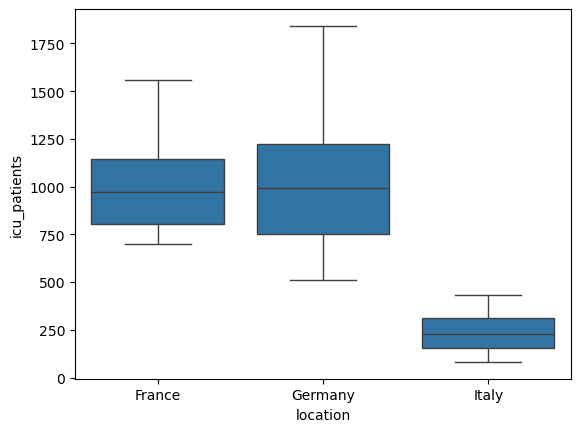

In [19]:
# Creo un grafico boxplot che mostra la differenza tra Italia, Germania e Francia riguardo il numero di pazienti in terapia intensiva
sns.boxplot(data=countries_icu, x='location', y='icu_patients')

<Axes: xlabel='location', ylabel='icu_patients'>

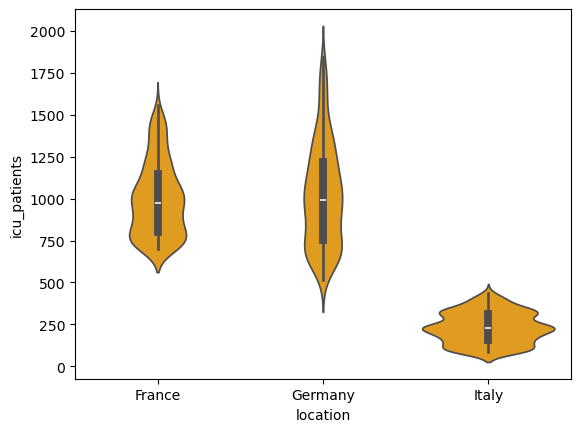

In [20]:
# Come alternativa, posso creare un grafico violin plot per meglio visualizzare la distribuzione dei dati
sns.violinplot(data=countries_icu, x='location', y='icu_patients', color='orange')

Osservazioni principali:
- L'Italia, nel periodo considerato, ha avuto un numero minore di ricoveri in ICU
- L'Italia ha una minore variazione, con una massa critica nel primo 50%
- La mediana di Francia e Germania è simile (attorno ai 900-1000 casi) -> in una giornata media ci sono circa 900-1000 ICU patient
- La distribuzione di Francia e Germania è molto ampia -> ampia variazione giornaliera di ICU patients
- Ci sono giornate in Francia con un picco di ICU patients attorno ai 1500
- La Francia ha una massa critica nel primo 50%, mentre la Germania ha una distribuzione più uniforme
- La Germania ha una mediana leggermente più alta della Francia
- La variazione giornaliera in Germania è molto ampia e più ampia anche della Francia

In [21]:
# Richiesta 4: riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023, mostrare la somma dei pazienti ospedalizzati

# Per fare ciò, seleziono le colonne di mio interesse (location, date, hosp_patients) e creo un nuovo dataframe
countries_hosp = df.loc[:, ['location', 'date', 'hosp_patients']].copy()

# Controllo il tipo di dato di ogni colonna
countries_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       429435 non-null  object 
 1   date           429435 non-null  object 
 2   hosp_patients  40656 non-null   float64
dtypes: float64(1), object(2)
memory usage: 9.8+ MB


In [22]:
# Trasformo il tipo di dato della colonna 'date' in formato datetime
countries_hosp['date'] = pd.to_datetime(countries_hosp['date']).copy()

# Seleziono i dati nell'anno 2023
countries_hosp = countries_hosp.loc[(countries_hosp['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (countries_hosp['date'].dt.year == 2023)]

countries_hosp

,location,date,hosp_patients
131459,France,2023-01-01,24157.0
131460,France,2023-01-02,24075.0
131461,France,2023-01-03,23516.0
131462,France,2023-01-04,23167.0
131463,France,2023-01-05,22664.0
...,...,...,...
364038,Spain,2023-12-27,NaN
364039,Spain,2023-12-28,NaN
364040,Spain,2023-12-29,NaN
364041,Spain,2023-12-30,NaN


In [23]:
# Calcolo la somma dei pazienti ospedalizzati per ogni nazione, escludendo la colonna 'date' perché non numerica (è possibile in quanto il df è già ordinato per data)
countries_hosp = countries_hosp.groupby('location').sum(numeric_only=True)

countries_hosp

,hosp_patients
location,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0


<Axes: xlabel='location', ylabel='hosp_patients'>

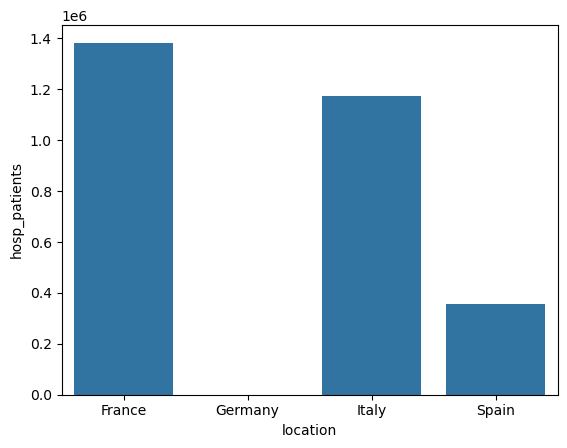

In [24]:
# Rappresento con un grafico a barre la somma dei pazienti ospedalizzati per ogni nazione
sns.barplot(data=countries_hosp, x=countries_hosp.index, y='hosp_patients')

Osservazioni principali:
- La Germania non riporta dati
- Francia e Italia presentano numeri di ricoveri abbastanza simili sebbene la Francia sia superiore di circa 200.000 ospedalizzazioni

Osservazioni combinate tra il boxplot e il barchart
- La Germania ha un grosso numero di ICU ma non riporta casi di ospedalizzazioni
- La Francia ha il più alto numero di ospedalizzazioni (tra i valori disponibili) e l'occupazione dei reparti ICU è notevolmente più grande dell'Italia ma meno della Germania
- L'Italia, pur avendo un alto numero di ospedalizzazioni, solo una piccola percentuale viene trasferita in ICU risultando in una minor occupazione media del reparto nei giorni

In [25]:
# Richiesta 5: se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

Nelle varie analisi dei df creati per rispondere alle richieste, è emersa la presenza di vari dati nulli espliciti al loro interno. Generalmente, i dati nulli possono essere o eliminati o modificati (sia con sostituzione del valore o per esempio tramite il metodo .interpolate).

Nelle mie analisi ho preferito non modificare o eliminare questo tipo di dati: la decisione è dovuta al fatto che i dati all'interno hanno un'alta variabilità sia nel tempo che nel numero di casi e, a mio avviso, una loro modifica avrebbe portato ad una probabile alterazione del risultato finale. In altre occasioni invece, come nel caso della prima richiesta, non ho volutamente considerato i dati nulli in quanto ho ritenuto non avere impatto nella costruzione della mia analisi.